In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("C:/Users/Welcome/Downloads/data crunch/train.csv")
train.head(8)

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Months.since.last.delinquent,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,Short Term,739.0,6 years,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,5.0,26,0,23986,40313,0.0,0.0,1
1,1,99999999,Long Term,619.0,6 years,Rent,54406.0,Debt Consolidation,1065.45,12.7,NaN,8,0,22938,31250,0.0,0.0,1
2,3,99999999,Short Term,738.0,less than 1 year,Rent,40480.0,Medical Bills,573.47,32.7,60.0,9,1,3963,5669,1.0,0.0,1
3,4,11200,Short Term,738.0,4 years,Rent,53965.0,Debt Consolidation,1358.11,15.8,NaN,8,1,11782,25951,1.0,0.0,1
4,5,3608,Short Term,731.0,10+ years,Home Mortgage,47709.0,Home Improvements,339.93,16.1,47.0,6,0,22909,25568,0.0,0.0,1
5,7,7877,Short Term,738.0,5 years,Home Mortgage,47707.0,Home Improvements,504.90,14.5,70.0,10,1,1837,6269,1.0,0.0,1
6,8,4732,Long Term,701.0,10+ years,Rent,62721.0,other,296.87,20.2,51.0,2,0,0,0,0.0,0.0,0
7,10,3469,Short Term,735.0,5 years,Rent,25135.0,Debt Consolidation,354.83,9.1,NaN,7,0,3646,6840,0.0,0.0,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 18 columns):
Loan.ID                         60804 non-null int64
Current.Loan.Amount             60804 non-null int64
Term                            60804 non-null object
Credit.Score                    48575 non-null float64
Years.in.current.job            58275 non-null object
Home.Ownership                  60804 non-null object
Annual.Income                   48575 non-null float64
Purpose                         60804 non-null object
Monthly.Debt                    60804 non-null float64
Years.of.Credit.History         60804 non-null float64
Months.since.last.delinquent    28329 non-null float64
Number.of.Open.Accounts         60804 non-null int64
Number.of.Credit.Problems       60804 non-null int64
Current.Credit.Balance          60804 non-null int64
Maximum.Open.Credit             60804 non-null int64
Bankruptcies                    60677 non-null float64
Tax.Liens                  

In [4]:
test = pd.read_csv("C:/Users/Welcome/Downloads/data crunch/test.csv")
test.head()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 18 columns):
Loan.ID                         23386 non-null int64
Current.Loan.Amount             23386 non-null int64
Term                            23386 non-null object
Credit.Score                    18585 non-null float64
Years.in.current.job            22370 non-null object
Home.Ownership                  23386 non-null object
Annual.Income                   18585 non-null float64
Purpose                         23386 non-null object
Monthly.Debt                    23386 non-null float64
Years.of.Credit.History         23386 non-null float64
Months.since.last.delinquent    10858 non-null float64
Number.of.Open.Accounts         23386 non-null int64
Number.of.Credit.Problems       23386 non-null int64
Current.Credit.Balance          23386 non-null int64
Maximum.Open.Credit             23386 non-null int64
Bankruptcies                    23332 non-null float64
Tax.Liens                  

In [5]:
test_original=test.copy()

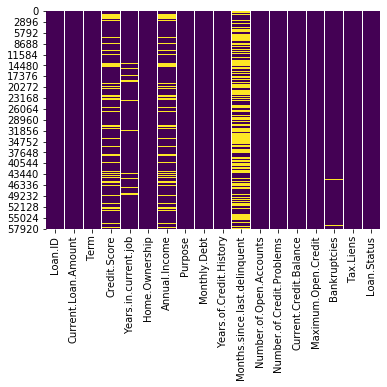

In [6]:
sns.heatmap(train.isnull(),cbar = False, cmap = 'viridis')

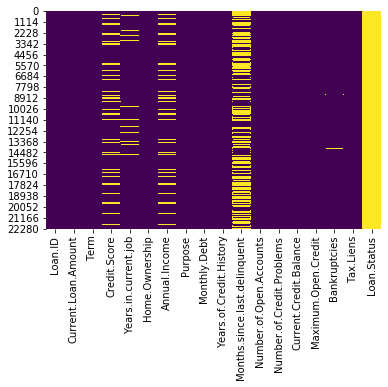

In [7]:
sns.heatmap(test.isnull(),cbar = False, cmap = 'viridis')

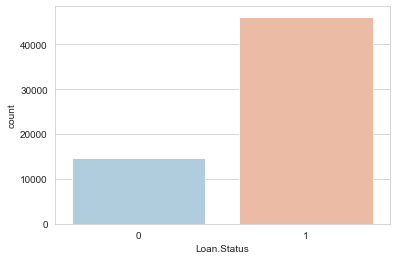

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Loan.Status',data=train,palette='RdBu_r')

In [9]:
train.isnull().sum()

Loan.ID                             0
Current.Loan.Amount                 0
Term                                0
Credit.Score                    12229
Years.in.current.job             2529
Home.Ownership                      0
Annual.Income                   12229
Purpose                             0
Monthly.Debt                        0
Years.of.Credit.History             0
Months.since.last.delinquent    32475
Number.of.Open.Accounts             0
Number.of.Credit.Problems           0
Current.Credit.Balance              0
Maximum.Open.Credit                 0
Bankruptcies                      127
Tax.Liens                           2
Loan.Status                         0
dtype: int64

In [10]:
train.drop('Months.since.last.delinquent',axis=1,inplace=True)

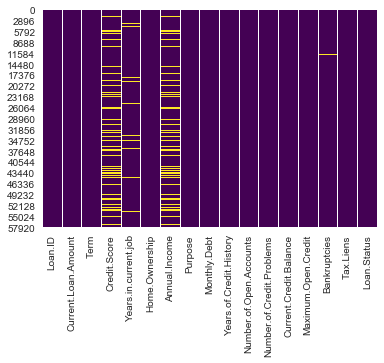

In [11]:
sns.heatmap(train.isnull(),cbar = False, cmap = 'viridis')

In [12]:
train['Term'] = train['Term'].map({'Short Term':int('1'), 'Long Term':int('0')})

In [13]:
train['Term'].value_counts()

1    44184
0    16620
Name: Term, dtype: int64

In [14]:
train['Years.in.current.job'].value_counts()

10+ years            18810
2 years               5539
3 years               5048
less than  1 year     4996
5 years               4150
1 year                3901
4 years               3754
6 years               3532
7 years               3313
8 years               2831
9 years               2401
Name: Years.in.current.job, dtype: int64

In [15]:
train['Years.in.current.job'] = train['Years.in.current.job'].map({'10+ years':int('0'),'1 year':int('1'),'2 years':int('2'),'3 years':int('3'),'4 years':int('4'),'5 years':int('5'),'6 years':int('6'),'7 years':int('7'),'8 years':int('8'),'9 years':int('9'),'less than  1 year':int('10')})

In [16]:
train['Years.in.current.job'].value_counts()

0.0     18810
2.0      5539
3.0      5048
10.0     4996
5.0      4150
1.0      3901
4.0      3754
6.0      3532
7.0      3313
8.0      2831
9.0      2401
Name: Years.in.current.job, dtype: int64

In [17]:
train.head()

,Loan.ID,Current.Loan.Amount,Term,Credit.Score,Years.in.current.job,Home.Ownership,Annual.Income,Purpose,Monthly.Debt,Years.of.Credit.History,Number.of.Open.Accounts,Number.of.Credit.Problems,Current.Credit.Balance,Maximum.Open.Credit,Bankruptcies,Tax.Liens,Loan.Status
0,0,17879,1,739.0,6.0,Home Mortgage,95357.0,Debt Consolidation,1509.82,34.4,26,0,23986,40313,0.0,0.0,1
1,1,99999999,0,619.0,6.0,Rent,54406.0,Debt Consolidation,1065.45,12.7,8,0,22938,31250,0.0,0.0,1
2,3,99999999,1,738.0,10.0,Rent,40480.0,Medical Bills,573.47,32.7,9,1,3963,5669,1.0,0.0,1
3,4,11200,1,738.0,4.0,Rent,53965.0,Debt Consolidation,1358.11,15.8,8,1,11782,25951,1.0,0.0,1
4,5,3608,1,731.0,0.0,Home Mortgage,47709.0,Home Improvements,339.93,16.1,6,0,22909,25568,0.0,0.0,1


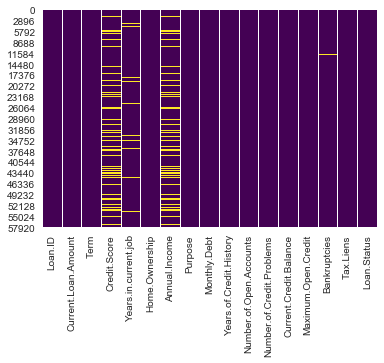

In [18]:
sns.heatmap(train.isnull(),cbar = False, cmap = 'viridis')

In [19]:
train['Home.Ownership'].value_counts()

Home Mortgage    29447
Rent             25737
Own Home          5516
HaveMortgage       104
Name: Home.Ownership, dtype: int64

In [20]:
train['Home.Ownership'] = train['Home.Ownership'].map({'Home Mortgage':int('0'),'Rent':int('1'),'Own Home':int('2'),'HaveMortgage':int('3')})

In [21]:
train['Home.Ownership'].value_counts()

0    29447
1    25737
2     5516
3      104
Name: Home.Ownership, dtype: int64

In [22]:
train['Purpose'].value_counts()

Debt Consolidation      47888
other                    3653
Home Improvements        3535
Other                    1975
Business Loan             910
Buy a Car                 765
Medical Bills             695
Buy House                 420
Take a Trip               296
major_purchase            213
small_business            170
moving                     83
Educational Expenses       70
vacation                   65
wedding                    64
renewable_energy            2
Name: Purpose, dtype: int64

In [23]:
train['Purpose'] = train['Purpose'].map({'Debt Consolidation': int('0'),'other':int('1'),'Home Improvements':int('2'),'Other':int('1'),'Business Loan':int('3'),'Buy a Car':int('4'),'Medical Bills':int('5'),'Buy House':int('6'),'Take a Trip':int('7'),'major_purchase':int('8'),'small_business':int('9'),'moving':int('10'),'Educational Expenses':int('11'),'vacation':int('12'),'wedding':int('13'),'renewable_energy':int('14')})

In [24]:
train['Purpose'].value_counts()

0     47888
1      5628
2      3535
3       910
4       765
5       695
6       420
7       296
8       213
9       170
10       83
11       70
12       65
13       64
14        2
Name: Purpose, dtype: int64

In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 17 columns):
Loan.ID                      60804 non-null int64
Current.Loan.Amount          60804 non-null int64
Term                         60804 non-null int64
Credit.Score                 48575 non-null float64
Years.in.current.job         58275 non-null float64
Home.Ownership               60804 non-null int64
Annual.Income                48575 non-null float64
Purpose                      60804 non-null int64
Monthly.Debt                 60804 non-null float64
Years.of.Credit.History      60804 non-null float64
Number.of.Open.Accounts      60804 non-null int64
Number.of.Credit.Problems    60804 non-null int64
Current.Credit.Balance       60804 non-null int64
Maximum.Open.Credit          60804 non-null int64
Bankruptcies                 60677 non-null float64
Tax.Liens                    60802 non-null float64
Loan.Status                  60804 non-null int64
dtypes: float64(7), int64(1

In [26]:
train['Credit.Score'].fillna(train['Credit.Score'].mode()[0], inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 17 columns):
Loan.ID                      60804 non-null int64
Current.Loan.Amount          60804 non-null int64
Term                         60804 non-null int64
Credit.Score                 60804 non-null float64
Years.in.current.job         58275 non-null float64
Home.Ownership               60804 non-null int64
Annual.Income                48575 non-null float64
Purpose                      60804 non-null int64
Monthly.Debt                 60804 non-null float64
Years.of.Credit.History      60804 non-null float64
Number.of.Open.Accounts      60804 non-null int64
Number.of.Credit.Problems    60804 non-null int64
Current.Credit.Balance       60804 non-null int64
Maximum.Open.Credit          60804 non-null int64
Bankruptcies                 60677 non-null float64
Tax.Liens                    60802 non-null float64
Loan.Status                  60804 non-null int64
dtypes: float64(7), int64(1

In [28]:
g =  train['Annual.Income'].value_counts()
g.head(25)

51025.0    13
59802.0    11
49995.0    11
70028.0    11
60030.0    11
60822.0    11
50240.0    10
61380.0    10
59580.0    10
58596.0    10
60198.0    10
60348.0    10
59334.0    10
60684.0    10
48960.0    10
60666.0    10
61188.0    10
58560.0    10
60000.0    10
60792.0    10
59280.0    10
49410.0     9
68551.0     9
60048.0     9
48920.0     9
Name: Annual.Income, dtype: int64

In [29]:
train['Annual.Income'].fillna(train['Annual.Income'].mode()[0], inplace=True)

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 17 columns):
Loan.ID                      60804 non-null int64
Current.Loan.Amount          60804 non-null int64
Term                         60804 non-null int64
Credit.Score                 60804 non-null float64
Years.in.current.job         58275 non-null float64
Home.Ownership               60804 non-null int64
Annual.Income                60804 non-null float64
Purpose                      60804 non-null int64
Monthly.Debt                 60804 non-null float64
Years.of.Credit.History      60804 non-null float64
Number.of.Open.Accounts      60804 non-null int64
Number.of.Credit.Problems    60804 non-null int64
Current.Credit.Balance       60804 non-null int64
Maximum.Open.Credit          60804 non-null int64
Bankruptcies                 60677 non-null float64
Tax.Liens                    60802 non-null float64
Loan.Status                  60804 non-null int64
dtypes: float64(7), int64(1

In [31]:
train['Years.in.current.job'].fillna(train['Years.in.current.job'].mode()[0], inplace=True)

In [32]:
train['Bankruptcies'].fillna(train['Bankruptcies'].mode()[0], inplace=True)

In [33]:
train['Tax.Liens'].fillna(train['Tax.Liens'].mode()[0], inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 17 columns):
Loan.ID                      60804 non-null int64
Current.Loan.Amount          60804 non-null int64
Term                         60804 non-null int64
Credit.Score                 60804 non-null float64
Years.in.current.job         60804 non-null float64
Home.Ownership               60804 non-null int64
Annual.Income                60804 non-null float64
Purpose                      60804 non-null int64
Monthly.Debt                 60804 non-null float64
Years.of.Credit.History      60804 non-null float64
Number.of.Open.Accounts      60804 non-null int64
Number.of.Credit.Problems    60804 non-null int64
Current.Credit.Balance       60804 non-null int64
Maximum.Open.Credit          60804 non-null int64
Bankruptcies                 60804 non-null float64
Tax.Liens                    60804 non-null float64
Loan.Status                  60804 non-null int64
dtypes: float64(7), int64(1

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60804 entries, 0 to 60803
Data columns (total 17 columns):
Loan.ID                      60804 non-null int64
Current.Loan.Amount          60804 non-null int64
Term                         60804 non-null int64
Credit.Score                 60804 non-null float64
Years.in.current.job         60804 non-null float64
Home.Ownership               60804 non-null int64
Annual.Income                60804 non-null float64
Purpose                      60804 non-null int64
Monthly.Debt                 60804 non-null float64
Years.of.Credit.History      60804 non-null float64
Number.of.Open.Accounts      60804 non-null int64
Number.of.Credit.Problems    60804 non-null int64
Current.Credit.Balance       60804 non-null int64
Maximum.Open.Credit          60804 non-null int64
Bankruptcies                 60804 non-null float64
Tax.Liens                    60804 non-null float64
Loan.Status                  60804 non-null int64
dtypes: float64(7), int64(1

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 18 columns):
Loan.ID                         23386 non-null int64
Current.Loan.Amount             23386 non-null int64
Term                            23386 non-null object
Credit.Score                    18585 non-null float64
Years.in.current.job            22370 non-null object
Home.Ownership                  23386 non-null object
Annual.Income                   18585 non-null float64
Purpose                         23386 non-null object
Monthly.Debt                    23386 non-null float64
Years.of.Credit.History         23386 non-null float64
Months.since.last.delinquent    10858 non-null float64
Number.of.Open.Accounts         23386 non-null int64
Number.of.Credit.Problems       23386 non-null int64
Current.Credit.Balance          23386 non-null int64
Maximum.Open.Credit             23386 non-null int64
Bankruptcies                    23332 non-null float64
Tax.Liens                  

In [37]:
test.drop('Months.since.last.delinquent',axis=1,inplace=True)

In [38]:
test['Term'] = test['Term'].map({'Short Term':int('1'), 'Long Term':int('0')})

In [39]:
test['Years.in.current.job'].value_counts()

10+ years            7220
2 years              2142
3 years              1894
less than  1 year    1857
5 years              1622
1 year               1540
4 years              1459
7 years              1356
6 years              1298
8 years              1069
9 years               913
Name: Years.in.current.job, dtype: int64

In [40]:
test['Years.in.current.job'] = test['Years.in.current.job'].map({'10+ years':int('0'),'1 year':int('1'),'2 years':int('2'),'3 years':int('3'),'4 years':int('4'),'5 years':int('5'),'6 years':int('6'),'7 years':int('7'),'8 years':int('8'),'9 years':int('9'),'less than  1 year':int('10')})

In [41]:
test['Home.Ownership'].value_counts()

Home Mortgage    11364
Rent              9827
Own Home          2141
HaveMortgage        54
Name: Home.Ownership, dtype: int64

In [42]:
test['Home.Ownership'] = test['Home.Ownership'].map({'Home Mortgage':int('0'),'Rent':int('1'),'Own Home':int('2'),'HaveMortgage':int('3')})

In [43]:
test['Home.Ownership'].value_counts()

0    11364
1     9827
2     2141
3       54
Name: Home.Ownership, dtype: int64

In [44]:
test['Purpose'].value_counts()

Debt Consolidation      18429
Home Improvements        1368
other                    1318
Other                     741
Business Loan             393
Buy a Car                 316
Medical Bills             260
Take a Trip               149
Buy House                 134
major_purchase            105
small_business             68
moving                     35
wedding                    30
vacation                   21
Educational Expenses       16
renewable_energy            3
Name: Purpose, dtype: int64

In [45]:
test['Purpose'] = test['Purpose'].map({'Debt Consolidation': int('0'),'other':int('1'),'Home Improvements':int('2'),'Other':int('1'),'Business Loan':int('3'),'Buy a Car':int('4'),'Medical Bills':int('5'),'Buy House':int('6'),'Take a Trip':int('7'),'major_purchase':int('8'),'small_business':int('9'),'moving':int('10'),'Educational Expenses':int('11'),'vacation':int('12'),'wedding':int('13'),'renewable_energy':int('14')})

In [46]:
test['Purpose'].value_counts()

0     18429
1      2059
2      1368
3       393
4       316
5       260
7       149
6       134
8       105
9        68
10       35
13       30
12       21
11       16
14        3
Name: Purpose, dtype: int64

In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 17 columns):
Loan.ID                      23386 non-null int64
Current.Loan.Amount          23386 non-null int64
Term                         23386 non-null int64
Credit.Score                 18585 non-null float64
Years.in.current.job         22370 non-null float64
Home.Ownership               23386 non-null int64
Annual.Income                18585 non-null float64
Purpose                      23386 non-null int64
Monthly.Debt                 23386 non-null float64
Years.of.Credit.History      23386 non-null float64
Number.of.Open.Accounts      23386 non-null int64
Number.of.Credit.Problems    23386 non-null int64
Current.Credit.Balance       23386 non-null int64
Maximum.Open.Credit          23386 non-null int64
Bankruptcies                 23332 non-null float64
Tax.Liens                    23378 non-null float64
Loan.Status                  0 non-null float64
dtypes: float64(8), int64(9)


In [48]:
test['Credit.Score'].fillna(test['Credit.Score'].mode()[0], inplace=True)

In [49]:
test['Annual.Income'].fillna(test['Annual.Income'].mode()[0], inplace=True)

In [50]:
test['Years.in.current.job'].fillna(test['Years.in.current.job'].mode()[0], inplace=True)

In [51]:
test['Bankruptcies'].fillna(test['Bankruptcies'].mode()[0], inplace=True)

In [52]:
test['Tax.Liens'].fillna(test['Tax.Liens'].mode()[0], inplace=True)

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 17 columns):
Loan.ID                      23386 non-null int64
Current.Loan.Amount          23386 non-null int64
Term                         23386 non-null int64
Credit.Score                 23386 non-null float64
Years.in.current.job         23386 non-null float64
Home.Ownership               23386 non-null int64
Annual.Income                23386 non-null float64
Purpose                      23386 non-null int64
Monthly.Debt                 23386 non-null float64
Years.of.Credit.History      23386 non-null float64
Number.of.Open.Accounts      23386 non-null int64
Number.of.Credit.Problems    23386 non-null int64
Current.Credit.Balance       23386 non-null int64
Maximum.Open.Credit          23386 non-null int64
Bankruptcies                 23386 non-null float64
Tax.Liens                    23386 non-null float64
Loan.Status                  0 non-null float64
dtypes: float64(8), int64(9)


In [54]:
train = train.drop('Loan.ID', axis = 1) 

In [55]:
test = test.drop('Loan.ID', axis = 1) 
test = test.drop('Loan.Status', axis = 1) 
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 15 columns):
Current.Loan.Amount          23386 non-null int64
Term                         23386 non-null int64
Credit.Score                 23386 non-null float64
Years.in.current.job         23386 non-null float64
Home.Ownership               23386 non-null int64
Annual.Income                23386 non-null float64
Purpose                      23386 non-null int64
Monthly.Debt                 23386 non-null float64
Years.of.Credit.History      23386 non-null float64
Number.of.Open.Accounts      23386 non-null int64
Number.of.Credit.Problems    23386 non-null int64
Current.Credit.Balance       23386 non-null int64
Maximum.Open.Credit          23386 non-null int64
Bankruptcies                 23386 non-null float64
Tax.Liens                    23386 non-null float64
dtypes: float64(7), int64(8)
memory usage: 2.7 MB


In [56]:
X= train.drop('Loan.Status', axis = 1)
y = train['Loan.Status']

In [57]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23386 entries, 0 to 23385
Data columns (total 15 columns):
Current.Loan.Amount          23386 non-null int64
Term                         23386 non-null int64
Credit.Score                 23386 non-null float64
Years.in.current.job         23386 non-null float64
Home.Ownership               23386 non-null int64
Annual.Income                23386 non-null float64
Purpose                      23386 non-null int64
Monthly.Debt                 23386 non-null float64
Years.of.Credit.History      23386 non-null float64
Number.of.Open.Accounts      23386 non-null int64
Number.of.Credit.Problems    23386 non-null int64
Current.Credit.Balance       23386 non-null int64
Maximum.Open.Credit          23386 non-null int64
Bankruptcies                 23386 non-null float64
Tax.Liens                    23386 non-null float64
dtypes: float64(7), int64(8)
memory usage: 2.7 MB


In [58]:
from sklearn.model_selection import train_test_split

In [59]:
X= train.drop('Loan.Status', axis = 1)
y = train['Loan.Status']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
rfc_pred = rfc.predict(X_test)

In [64]:
print(confusion_matrix(y_test,rfc_pred))

[[ 1015  3313]
 [  179 13735]]


In [65]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      0.23      0.37      4328
           1       0.81      0.99      0.89     13914

    accuracy                           0.81     18242
   macro avg       0.83      0.61      0.63     18242
weighted avg       0.82      0.81      0.76     18242



In [66]:
rfc_predtest = rfc.predict(test)

In [67]:
submission=pd.read_csv("C:/Users/Welcome/Downloads/data crunch/SubmissionSample.csv")


In [68]:
submission['Loan.Status']=rfc_predtest 
submission['Loan.ID']=test_original['Loan.ID']

In [69]:
pd.DataFrame(submission, columns=['Loan.ID','Loan.Status']).to_csv('datacrunch_Ragavendar13.csv',index = False)